# IBM_HR_Analytics_Employee_Attrition_Performance 

### The dataset is about employee attrition. This analysis can discover if any particular factors or patterns that lead to attrition. If so, employers can take certain precausion to prevent attrition which in employer of view, employee attrition is a loss to company, in both monetary and non-monetary. 

#### import modules and data input 

In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [129]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [130]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Attrition will be the label column and remaining will be feature

In [131]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


EmployeeCount can be deleted as its value always equal 1

In [132]:
del data['EmployeeCount']

#### Check if any missing values

In [133]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

There is no missing value

#### Data exploration

In [134]:
data.shape

(1470, 34)

There are 1470 records and 35 variables

In [135]:
data.groupby('Attrition').size()

Attrition
No     1233
Yes     237
dtype: int64

There are 237 attritions in dataset 

Let's change Attrition to binary: 1 is Yes , 0 is No 

In [136]:
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

There are many reasons causing attrition, from personal related (eg age, family) to job related (eg salary, bored in position)
<br> Before digging in deep, let's have a prelimary finding first

First is about age (Maybe old enough to retire)

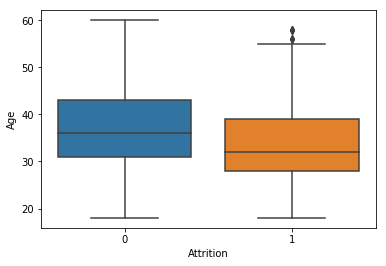

In [137]:
sns.boxplot(x='Attrition',y='Age',data=data)

In average, attrited employees are younger than non-attrited employees

Second is salary (Unsatisfactory in salary??)(DailyRate in data) 

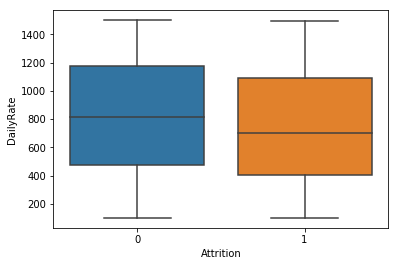

In [138]:
sns.boxplot(x='Attrition',y='DailyRate',data=data)

There is less difference for daily rate between attrited and non-attrited employees than age.
<br>Maybe wage is not as an important factor than expected

Next is duration of work in company (Bored, no further excitment from work?)

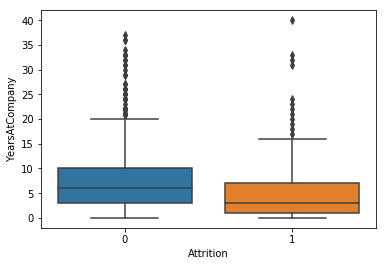

In [139]:
sns.boxplot(x='Attrition',y='YearsAtCompany',data=data)

There are many extreme cases in both attrited and non-attrited employees. Hard to determine if duration of work is related at this moment

#### Data transformation

There are three text categories, BusinessTravel, Department and EducationField. Moreover, Education, EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction and WorkLifeBalance are also categorical data. First need to separate into dummy variables

In [140]:
num_cat=['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction' , 'WorkLifeBalance']
for i in num_cat:
    data[i]=data[i].astype('category')

In [141]:
data=pd.get_dummies(data)

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 75 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
EmployeeNumber                       1470 non-null int64
HourlyRate                           1470 non-null int64
JobLevel                             1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
StandardHours                        1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1470 non-null int64
TrainingTimesLastYear                1470 non-null int64
YearsAtCompany                       1

From the last result, apparently there is only one variable for over18. Can double check and if so then it can be deleted

In [143]:
data['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

All employees are over 18. So it can be deleted 

In [144]:
del data['Over18_Y']

In [145]:
data.shape

(1470, 74)

After transformation, there are 74 variables 

#### Modelling

First is to separate feature set and label set

In [146]:
X=data[data.columns.difference(['Attrition'])]
y=data['Attrition']

Second is to separate training set and test set 

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

Then is to standardize numeric variables. Back to previous finding, attrition is also numeric variable. Therefore need to special handle

In [148]:
numeric_variables = list(data.select_dtypes(include='int64').columns.values)

In [149]:
numeric_variables.remove('Attrition')

In [150]:
numeric_variables

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'JobLevel',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [151]:
#First is to reset index for X_train and X_test
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
#Separate into two dataframes for numeric and non-numeric variables 
X_train_num=X_train[numeric_variables]
X_train_nnum=X_train[X_train.columns.difference(numeric_variables)]
X_test_num=X_test[numeric_variables]
X_test_nnum=X_test[X_train.columns.difference(numeric_variables)]
#Set standard scaler 
scaler=StandardScaler()
#Fit and transform training set 
X_train_scaled=scaler.fit_transform(X_train_num)
X_train_scaled=pd.DataFrame(data=X_train_scaled,columns=X_train_num.columns)
X_train_scaled=pd.concat([X_train_scaled,X_train_nnum],axis=1)
#Transform training set
X_test_scaled=scaler.transform(X_test_num)
X_test_scaled=pd.DataFrame(data=X_test_scaled,columns=X_test_num.columns)
X_test_scaled=pd.concat([X_test_scaled,X_test_nnum],axis=1)

#### 1. K Nearest Neighbors
<br>K Nearest Neighbors is a simple non-parametric method for classification. The label will be determined by neighbors

In [152]:
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [153]:
knn.score(X_test_scaled,y_test)

0.8707482993197279

K Nearest Neighbors has 87% of accuracy. Let's have a look for confusion for better understanding

In [154]:
y_predict = knn.predict(X_test_scaled)
confusion_matrix(y_test,y_predict)

array([[250,   5],
       [ 33,   6]], dtype=int64)

Because attrition is not balanced, by just looking at score will cause bise on performance
<br>Apparently KNN wrongly predicts attrition=1 as 0 frequently. Only 6 attrition records are correctly predicted. 
<br>A very bad prediction model 

#### 2. LogisticRegression

In [155]:
logis=LogisticRegression()
logis.fit(X_train_scaled,y_train)
logis.score(X_test_scaled,y_test)

0.8707482993197279

In [156]:
y_predict = logis.predict(X_test_scaled)
confusion_matrix(y_test,y_predict)

array([[239,  16],
       [ 22,  17]], dtype=int64)

Better than KNN as there are 17 attrited records are correctly predicted. 
And score is also higher than KNN

In [160]:
logis.coef_

array([[-0.23415001, -0.141747  ,  0.36221354, -0.07519845,  0.04810014,
        -0.14640367, -0.0013701 ,  0.07790022,  0.4971113 , -0.07517327,
         0.        , -0.19198583, -0.48476996, -0.20002524,  0.68646074,
        -0.63196969,  0.5309946 , -0.52911379, -0.91773692,  0.68681697,
        -0.07178425,  0.00975286, -0.51802167,  0.20556462,  0.25331678,
        -0.44349955, -0.08337804, -0.36177209, -0.27658344,  0.60921215,
        -0.10556734, -0.03982613,  0.2138464 ,  0.20103796, -0.57219508,
         0.70896145, -0.23708471, -0.3534914 , -0.42108954, -0.38099439,
         0.0782902 ,  0.99191343, -0.12570742, -0.32536007, -0.84355014,
        -0.81287247,  0.42633922,  0.98245984, -0.37390131, -0.14147957,
        -0.91659281, -0.07092164, -0.16095859,  0.76522312,  0.62456545,
        -0.20797858, -0.02238482, -0.69690624, -0.69037687, -0.26256084,
         0.65023352, -1.23921032,  0.93650613, -0.15358468, -0.14911951,
         0.40102194, -0.36041001, -0.13709582, -0.2

In [167]:
print('The most positive influent coefficient is {0}, with value equal to {1}'.format(X_test_scaled.columns[np.argmax(logis.coef_)],logis.coef_.max()))

The most positive influent coefficient is JobInvolvement_1, with value equal to 0.9919134282687618


In [168]:
print('The most negative influent coefficient is {0}, with value equal to {1}'.format(X_test_scaled.columns[np.argmin(logis.coef_)],logis.coef_.min()))

The most negative influent coefficient is OverTime_No, with value equal to -1.23921032348314


Apparently if your employees give you 'Low' in Job Satisfcation, this is already a signal that he or she may leave company
<br>And definitely employees enjoy no overwork, this greatly reduce chance of attrition.

In [180]:
pd.crosstab(data.JobInvolvement_1,data.Attrition)

Attrition,0,1
JobInvolvement_1,,
0,1178,209
1,55,28


Over one third of employees choosing JobInvolvement=1 were attrited. This is a very good sign to predict employee leaving 

In [181]:
pd.crosstab(data.OverTime_No,data.Attrition)

Attrition,0,1
OverTime_No,,
0,289,127
1,944,110


No overtime can greatly reduce chance of attrition by two third. Another good policy to be enforced for reducing attrition